# Machine Learning - Practical 1 - Linear Regression

Names: {YOUR NAMES}  
Summer Term 2024   

This notebook provides you with the assignments and the overall code structure you need to complete the assignment. There are also questions that you need to answer in text form. Please use full sentences and reasonably correct spelling/grammar.

Regarding submission & grading:

- Work in groups of three and hand in your solution as a group.

- Solutions need to be uploaded to StudIP until the submission date indicated in the course plan. Please upload a copy of this notebook and a PDF version of it after you ran it.

- Solutions need to be presented to tutors in tutorial. Presentation dates are listed in the course plan. Every group member needs to be able to explain everything.

- You have to solve N-1 practicals to get admission to the exam.

- For plots you create yourself, all axes must be labeled. 

- Do not change the function interfaces.

## Imports

Jupyter Notebook provides the possibility of using libraries, functions and variables globally. This means, once you import the libraries, functions, etc. you won't have to import them again in the next cell. However, if for any reason you end the session (crash, timeout, etc.), then you'll have to run this cell to have your libraries imported again. So, let's go ahead and import whatever we need in this homework assignment.

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## The  dataset

The dataset consists of over 20.000 materials and lists their physical features. From these features, we want to learn how to predict the critical temperature, i.e. the temperature we need to cool the material to so it becomes superconductive. First load and familiarize yourself with the data set a bit.

In [2]:
data = pd.read_csv('superconduct_train.csv')
print(data.shape)

(21263, 82)


In [3]:
data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


Because the dataset is rather large, we prepare a small subset of the data as training set, and another subset as test set. To make the computations reproducible, we set the random seed. This makes the train and test splits same even if you re-run the notebook. Keeping the splits same is important for the fair models comparison.

In [4]:
target_clm = 'critical_temp'  # the critical temperature is our target variable
n_trainset = 200  # size of the training set
n_testset = 500  # size of the test set

In [5]:
# set random seed to make sure every test set is the same
np.random.seed(seed=1)

idx = np.arange(data.shape[0])
idx_shuffled = np.random.permutation(idx)  # shuffle indices to split into training and test set

test_idx = idx_shuffled[:n_testset]
train_idx = idx_shuffled[n_testset:n_testset+n_trainset]
train_full_idx = idx_shuffled[n_testset:]

X_test = data.loc[test_idx, data.columns != target_clm].values
y_test = data.loc[test_idx, data.columns == target_clm].values
print('Test set shapes (X and y)', X_test.shape, y_test.shape)

X_train = data.loc[train_idx, data.columns != target_clm].values
y_train = data.loc[train_idx, data.columns == target_clm].values
print('Small training set shapes (X and y):', X_train.shape, y_train.shape)

X_train_full = data.loc[train_full_idx, data.columns != target_clm].values
y_train_full = data.loc[train_full_idx, data.columns == target_clm].values
print('Full training set shapes (X and y):', X_train_full.shape, y_train_full.shape)

Test set shapes (X and y) (500, 81) (500, 1)
Small training set shapes (X and y): (200, 81) (200, 1)
Full training set shapes (X and y): (20763, 81) (20763, 1)


## Task 1: Plot the dataset

To explore the dataset, use `X_train_full` and `y_train_full` for two descriptive plots:

* **Histogram** of the target variable. Use `plt.hist`.

* **Scatter plots** relating the target variable to one of the feature values. For this you will need 81 scatter plots. Arrange them in one big figure with 9x9 subplots. Use `plt.scatter`. You may need to adjust the marker size and the alpha blending value. 

Furthermore, we need to normalize the data, such that each feature has a mean of zero mean and a variance of one. Implement a function `normalize` which normalizes the data. Print the means and standard variation of the first five features before and after.

Text(0, 0.5, 'Frequency')

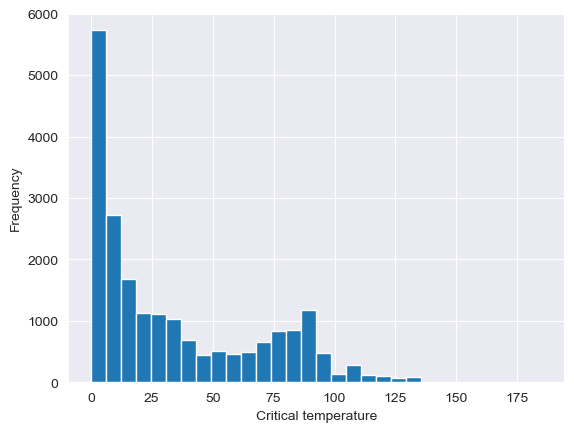

In [6]:
# Histogram of the target variable
plt.hist(y_train_full, bins=30)
plt.xlabel('Critical temperature')
plt.ylabel('Frequency')

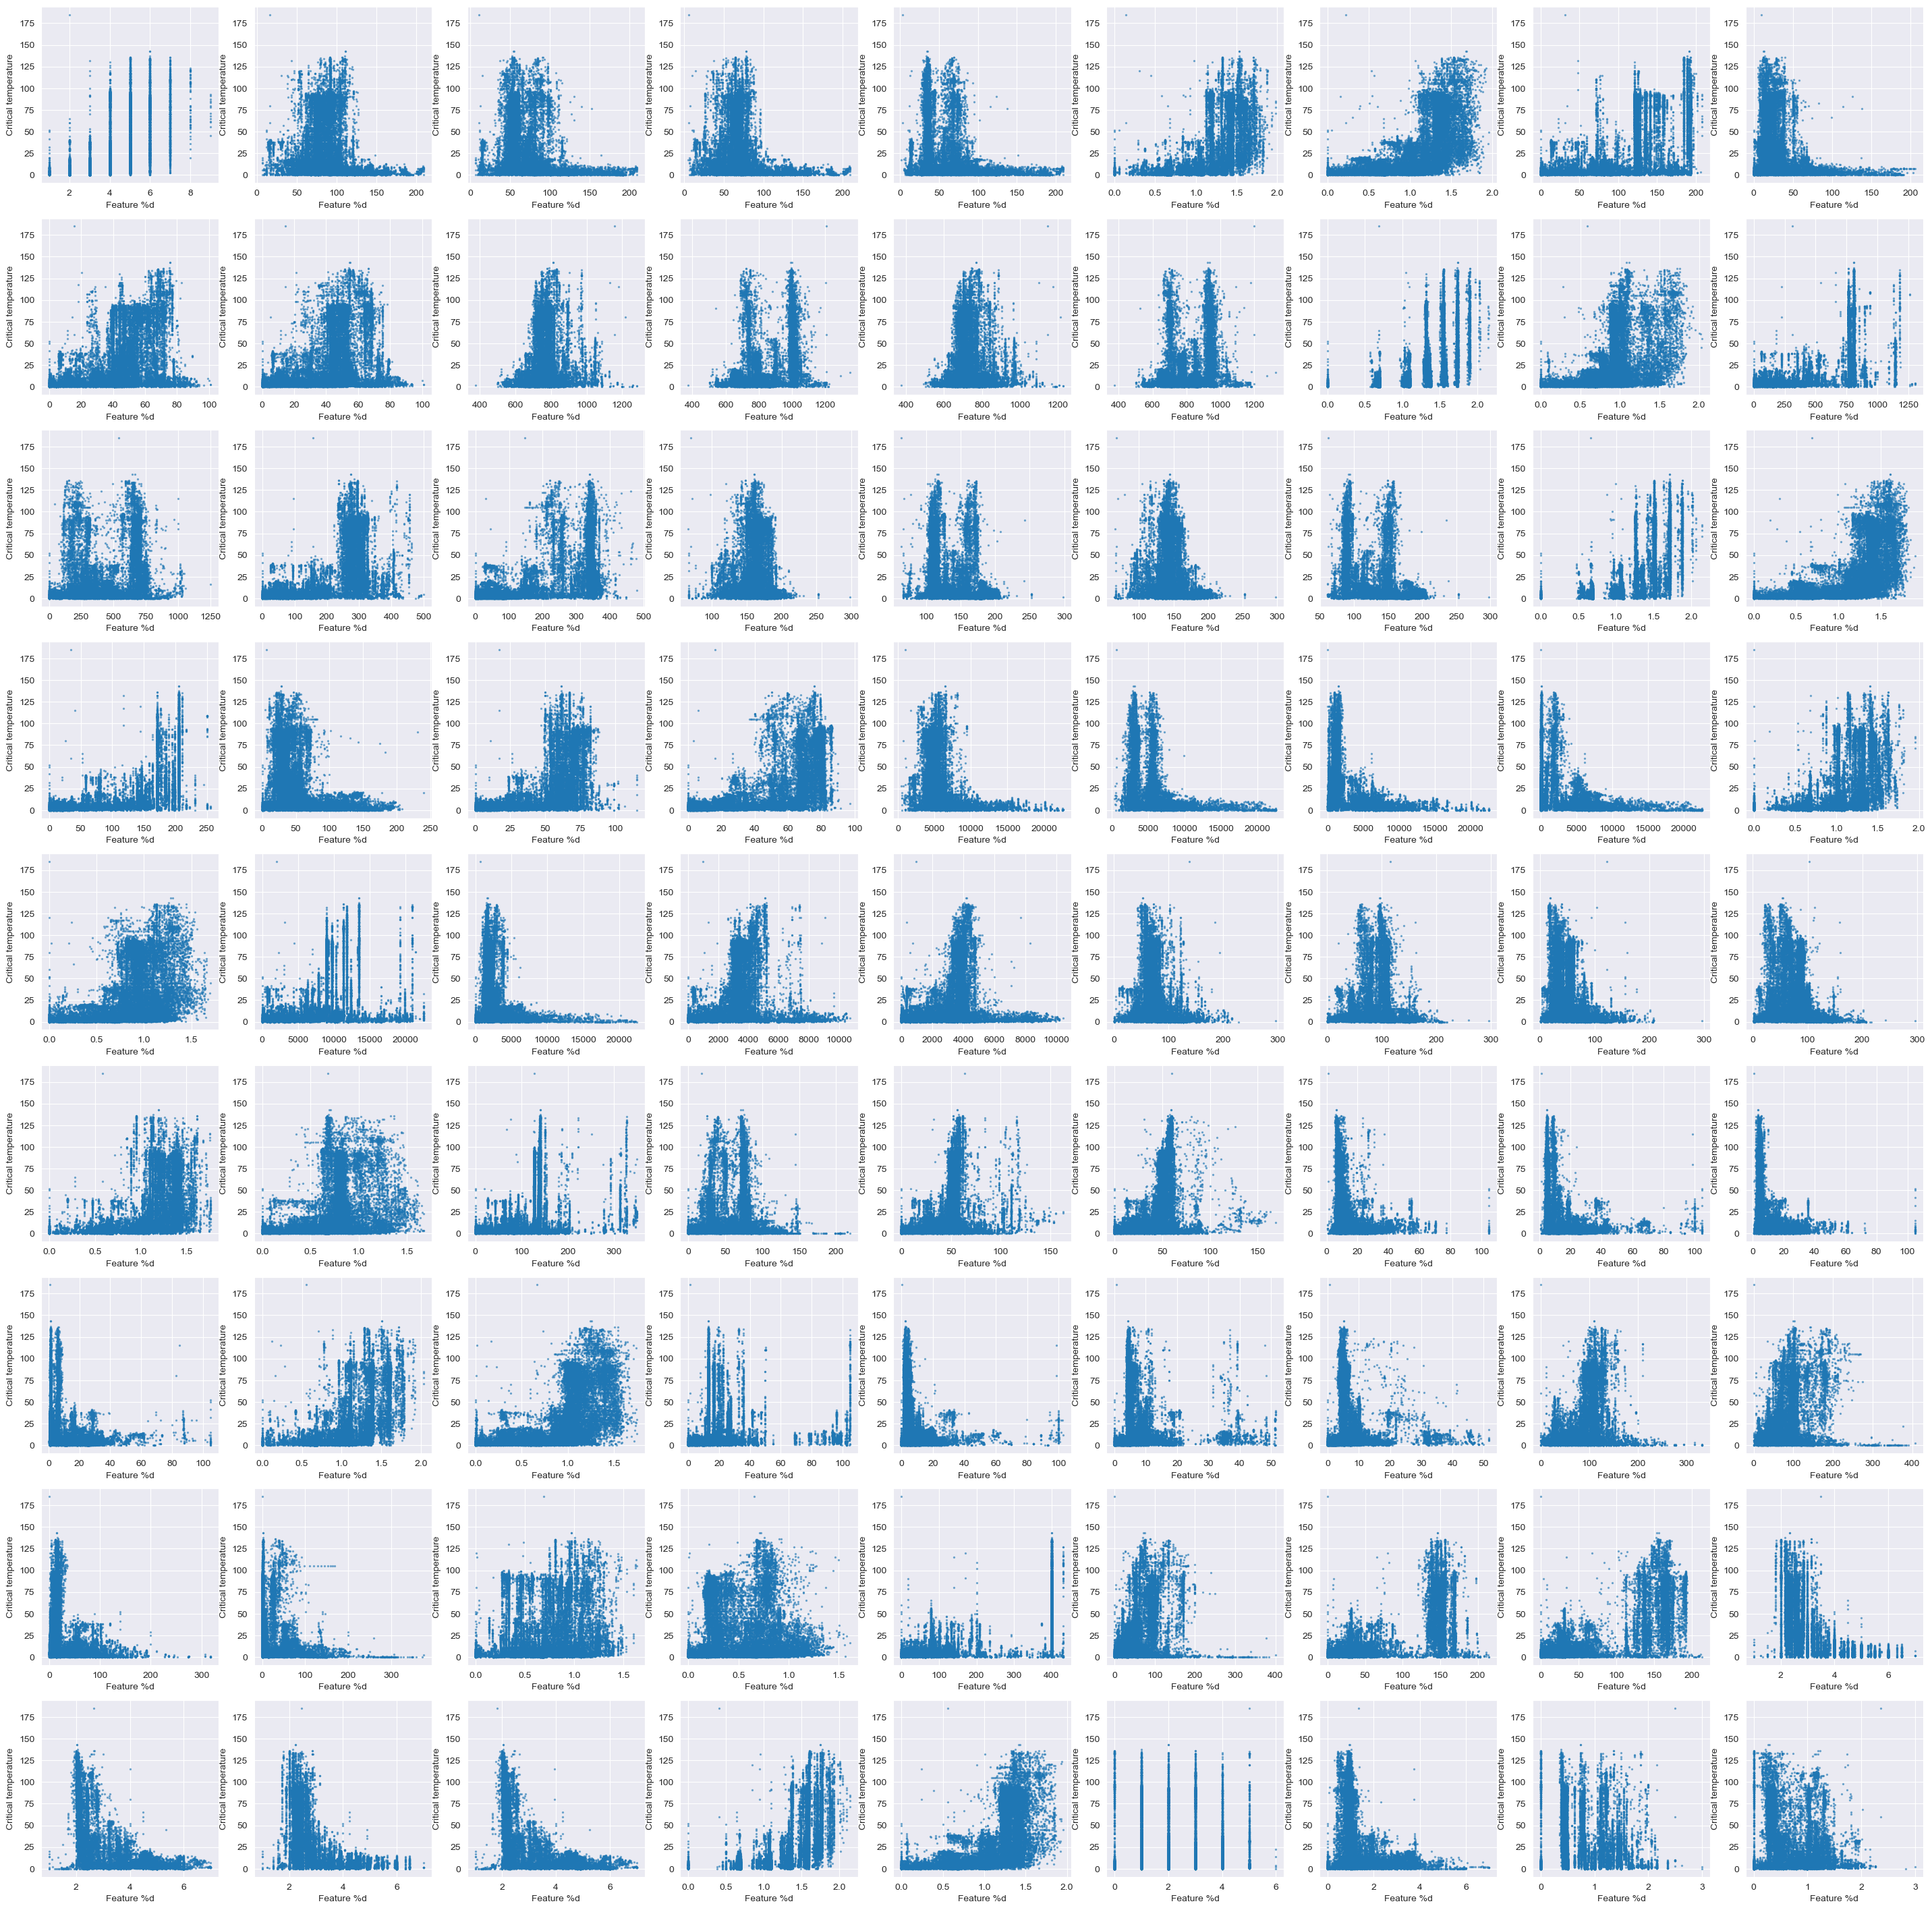

In [7]:
# Scatter plots of the target variable vs. features
fig, ax = plt.subplots(9, 9, figsize=(36, 36))
for i in range(9):
    for j in range(9):
        ax[i, j].scatter(X_train_full[:, i*9+j], y_train_full, s=2, alpha=0.5)
        ax[i, j].set_xlabel(f'Feature %d' )
        ax[i, j].set_ylabel('Critical temperature')

In [8]:
# Normalize
def Normalize(data):
    return data

data_norm = Normalize(X_train_full)



Which material properties may be useful for predicting superconductivity? What other observations can you make?

 YOUR ANSWER HERE

## Task 2:  Implement your own OLS estimator

We want to use linear regression to predict the critical temperature. Implement the ordinary least squares estimator without regularization 'by hand':

$w = (X^TX)^{-1}X^Ty$

To make life a bit easier, we provide a function that can be used to plot regression results. In addition it computes the mean squared error and the squared correlation between the true and predicted values. 

In [9]:
def plot_regression_results(y_test, y_pred, weights):
    '''Produces three plots to analyze the results of linear regression:
        -True vs predicted
        -Raw residual histogram
        -Weight histogram

    Inputs:
        y_test: (n_observations,) numpy array with true values
        y_pred: (n_observations,) numpy array with predicted values
        weights: (n_weights) numpy array with regression weights'''

    print('MSE: ', mean_squared_error(y_test, y_pred))
    print('r^2: ', r2_score(y_test, y_pred))

    fig, ax = plt.subplots(1, 3, figsize=(9, 3))
    # predicted vs true
    ax[0].scatter(y_test, y_pred, s=2)
    ax[0].set_title('True vs. Predicted')
    ax[0].set_xlabel('True %s' % (target_clm))
    ax[0].set_ylabel('Predicted %s' % (target_clm))

    # residuals
    error = np.squeeze(np.array(y_test)) - np.squeeze(np.array(y_pred))
    ax[1].hist(np.array(error), bins=30)
    ax[1].set_title('Raw residuals')
    ax[1].set_xlabel('(true-predicted)')

    # weight histogram
    ax[2].hist(weights, bins=30)
    ax[2].set_title('weight histogram')

    plt.tight_layout()
    
    


As an example, we here show you how to use this function with random data. 

MSE:  17928.79570726673
r^2:  -13.313953173396845


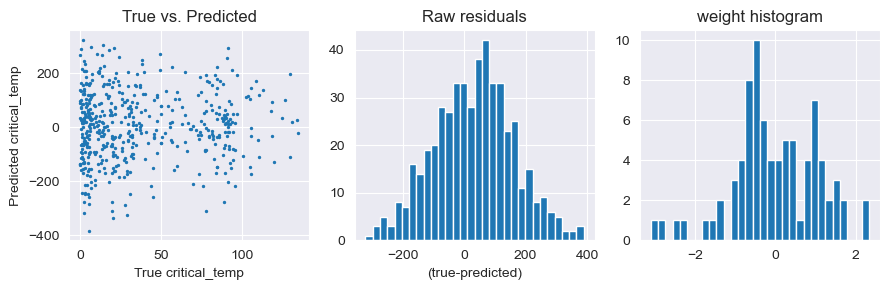

In [10]:
# weights is a vector of length 82: the first value is the intercept (beta0), then 81 coefficients
weights = np.random.randn(82)

# Model predictions on the test set
y_pred_testing = np.random.randn(y_test.size) * np.max(y_test)

plot_regression_results(y_test, y_pred_testing, weights)

Implement OLS linear regression yourself. Use `X_train` and `y_train` for estimating the weights and compute the MSE and $r^2$ from `X_test`. When you call our plotting function with the regression result, you should get mean squared error of 707.8. 
$w = (X^TX)^{-1}X^Ty$

$w = (X^TX)^{-1}X^Ty$

[[ 2.33512549e+01]
 [-1.75525617e+01]
 [ 3.25117409e+00]
 [-3.14777986e+00]
 [-2.90326374e+00]
 [ 2.94251673e+00]
 [-5.66924703e+01]
 [ 8.31701343e+01]
 [ 1.87391057e-01]
 [ 1.86370144e-01]
 [-1.48689547e+00]
 [ 1.09309762e+00]
 [-2.15179811e+00]
 [ 2.58784723e+00]
 [ 2.08548555e+00]
 [-2.59979836e+00]
 [ 4.05600529e+02]
 [ 1.40994850e+02]
 [ 3.10938610e-01]
 [ 4.81861693e-02]
 [-1.64119198e-01]
 [-5.73115362e-01]
 [ 2.79926044e+00]
 [-5.79449096e+00]
 [-2.74562840e+00]
 [ 5.98142075e+00]
 [-2.28554821e+02]
 [-8.22290756e+01]
 [-4.94761681e-01]
 [-5.00116060e-01]
 [-3.01207512e-01]
 [ 2.03596729e+00]
 [-8.69526877e-03]
 [ 8.96514087e-03]
 [ 9.27263492e-03]
 [-9.46713054e-03]
 [-2.84615681e+01]
 [-4.69124690e+01]
 [-2.86908333e-04]
 [ 8.57686728e-04]
 [ 8.88598375e-03]
 [-1.31562937e-02]
 [-9.72682536e-01]
 [ 1.70608523e+00]
 [ 7.18046063e-01]
 [-1.43681052e+00]
 [-2.59860283e+00]
 [ 1.29310018e+00]
 [-5.92062320e-01]
 [-2.66377722e-01]
 [ 1.99347981e+00]
 [-8.20918800e-01]
 [ 2.2243459

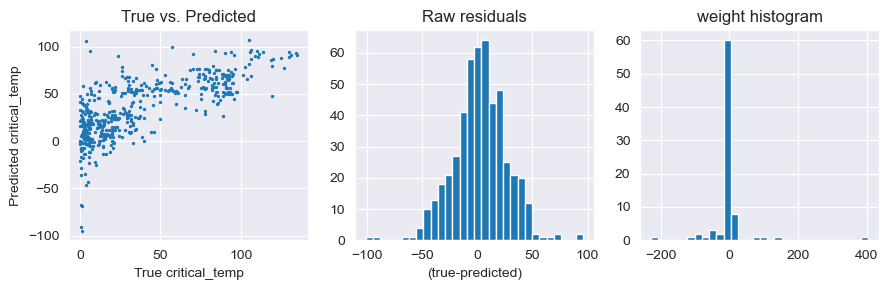

In [11]:
def ols_regression(X_test, X_train, y_train):
    '''Computes OLS weights for linear regression without regularization on the training set and
       returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         Both the training and the test set need to be appended manually by a columns of 1s to add
         an offset term to the linear regression model.
    '''

    # ---------------- INSERT CODE ----------------------
    #add a first column of zeros to the X_train and X_test
    X= np.hstack((np.ones((X_train.shape[0],1)),X_train))
    X_test = np.hstack((np.ones((X_test.shape[0],1)),X_test))
    y= y_train

    XT=X.T
    XTX=XT@X

    inv=np.linalg.pinv(XTX)

    weights=(inv@XT)@y
    
    y_pred = X_test@weights
    print(weights)

    # ---------------- END CODE -------------------------

    return weights, y_pred

weights, y_pred = ols_regression(X_test, X_train, y_train)
plot_regression_results(y_test, y_pred, weights)

In [12]:
# Plots of the results


What do you observe? Is the linear regression model good?

YOUR ANSWER HERE

## Task 3: Compare your implementation to sklearn

Now, familiarize yourself with the sklearn library. In the section on linear models:

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

you will find `sklearn.linear_model.LinearRegression`, the `sklearn` implementation of the OLS estimator. Use this sklearn class to implement OLS linear regression. Again obtain estimates of the weights on `X_train` and `y_train` and compute the MSE and $r^2$ on `X_test`.


In [13]:
def sklearn_regression(X_test, X_train, y_train):
    '''Computes OLS weights for linear regression without regularization using the sklearn library on the training set and
       returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         The sklearn library automatically takes care of adding a column for the offset.
    '''

    # ---------------- INSERT CODE ----------------------
    #add a first column of zeros to the X_train and X_test
    X= np.hstack((np.ones((X_train.shape[0],1)),X_train))
    X_test = np.hstack((np.ones((X_test.shape[0],1)),X_test))
    y= y_train
    # Create linear regression object
    regr = linear_model.LinearRegression()
    weights = regr.fit(X, y).coef_
    print( regr.score(X, y))
    y_pred = regr.predict(X_test)    


    # ---------------- END CODE -------------------------

    return weights, y_pred

0.5802124658196721
MSE:  1138.8039841787672
r^2:  0.09080413601869775


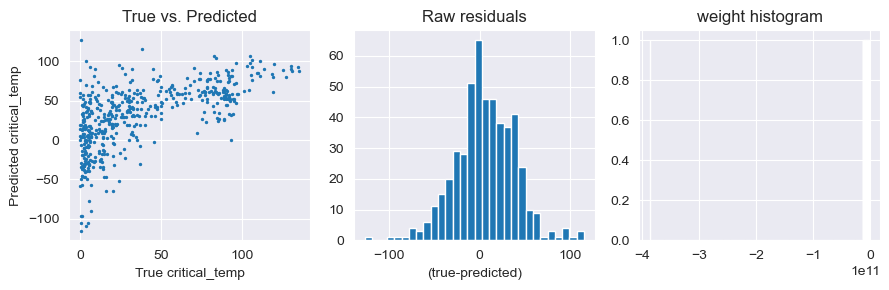

In [14]:
weights, y_pred = sklearn_regression(X_test, X_train, y_train)
plot_regression_results(y_test, y_pred, weights)

If you implemented everything correctly, the MSE is again 707.8.

Fit the model using the larger training set, `X_train_full` and `y_train_full`, and again evaluate on `X_test`.

0.7372191907488742
MSE:  329.86070104109103
r^2:  0.7366465263178655


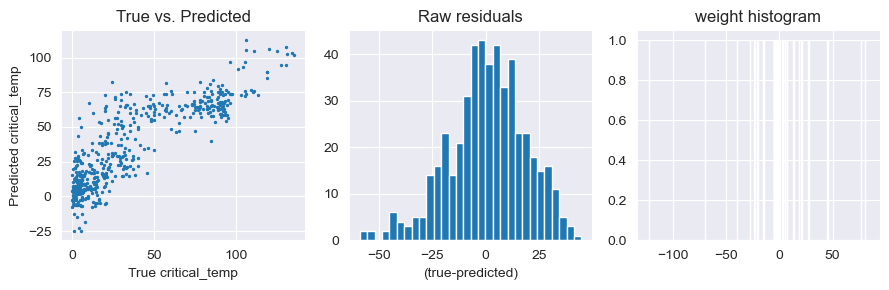

In [15]:
weights, y_pred = sklearn_regression(X_test, X_train_full, y_train_full)
plot_regression_results(y_test, y_pred, weights)

 How does test set performance change? What else changes?

YOU ANSWER HERE

## Task 4: Regularization with ridge regression

We will now explore how a penalty term on the weights can improve the prediction quality for finite data sets. Implement the analytical solution of ridge regression 

$w = (X^TX + \alpha I_D)^{-1}X^Ty$


as a function that can take different values of $\alpha$, the regularization strength, as an input. In the lecture, this parameter was called $\lambda$, but this is a reserved keyword in Python.

In [16]:
def ridge_regression(X_test, X_train, y_train, alpha):
    '''Computes OLS weights for regularized linear regression with regularization strength alpha
       on the training set and returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         alpha: scalar, regularization strength

       Outputs:
         weights: The weight vector for the regression model including the offset
         y_pred: The predictions on the TEST set

       Note:
         Both the training and the test set need to be appended manually by a columns of 1s to add
         an offset term to the linear regression model.
         
         $w = (X^TX + \alpha I_D)^{-1}X^Ty$
    '''

    # ---------------- INSERT CODE ----------------------
    #add a first column of zeros to the X_train and X_test
    X= np.hstack((np.ones((X_train.shape[0],1)),X_train))
    X_test = np.hstack((np.ones((X_test.shape[0],1)),X_test))
    y= y_train
    I= np.eye(X.shape[1])
    I[0,0]=0
    XT=X.T
    XTX=XT@X
    weights=np.linalg.inv(XTX+alpha*I)@XT@y
    y_pred = X_test@weights
    
    

    # ---------------- END CODE -------------------------

    return weights, y_pred

Run the ridge regression on `X_train` with an alpha value of 10 and plot the obtained weights.

MSE:  429.71729527210897
r^2:  0.6569232344015907


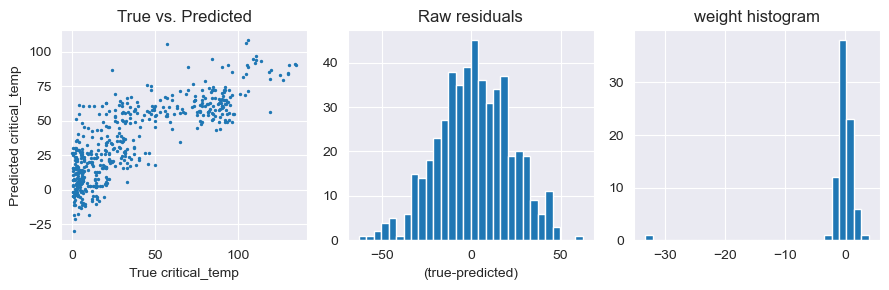

In [31]:
# Run ridge regression with alpha=10
weights, y_pred = ridge_regression(X_test, X_train, y_train, 10)
plot_regression_results(y_test, y_pred, weights)

# plot the weights


Now test a range of log-spaced $\alpha\text{s}$ (~10-20), which cover several orders of magnitude, e.g. from 10^-7 to 10^7. 

* For each $\alpha$, you will get one model with one set of weights. 
* For each model, compute the error on the test set. 

Store both the errors and weights of all models for later use. You can use the function `mean_squared_error` from sklearn (imported above) to compute the MSE.


In [18]:
alphas = np.logspace(-7, 7, 20)

# ---------------- INSERT CODE ----------------------

for alpha in alphas:
    weights, y_pred = ridge_regression(X_test, X_train, y_train, alpha)
    weights = [x for x in weights]
    mse = mean_squared_error(y_test, y_pred)
    print(f'alpha: {alpha}, MSE: {mse}')
    if alpha == alphas[0]:
        all_weights =  np.array([weights])
        all_mse = mse
    else:
        all_mse = np.vstack((all_mse, mse))
        all_weights = np.vstack((all_weights, [weights]))

all_weights= np.squeeze(all_weights)
# ---------------- END CODE -------------------------

alpha: 1e-07, MSE: 599.7369581783507
alpha: 5.455594781168515e-07, MSE: 599.7244681882397
alpha: 2.976351441631319e-06, MSE: 599.6564682362714
alpha: 1.623776739188721e-05, MSE: 599.2895967656083
alpha: 8.858667904100833e-05, MSE: 597.4022258605476
alpha: 0.0004832930238571752, MSE: 589.5496423314914
alpha: 0.0026366508987303553, MSE: 570.7084456120983
alpha: 0.01438449888287663, MSE: 544.9925108898681
alpha: 0.07847599703514607, MSE: 516.4839000068615
alpha: 0.4281332398719387, MSE: 476.63849613727655
alpha: 2.3357214690901213, MSE: 442.968817657809
alpha: 12.742749857031322, MSE: 427.7883420558253
alpha: 69.51927961775591, MSE: 412.58817811980924
alpha: 379.26901907322383, MSE: 406.0886912129696
alpha: 2069.13808111479, MSE: 418.93302001020146
alpha: 11288.378916846883, MSE: 435.35824566307986
alpha: 61584.82110660255, MSE: 466.37297056207314
alpha: 335981.8286283774, MSE: 513.2234638207541
alpha: 1832980.71083243, MSE: 574.7235114541699
alpha: 10000000.0, MSE: 669.4637983239219


In [19]:
all_weights

array([[ 2.33559790e+01, -1.75526119e+01,  3.25119980e+00, ...,
         9.09645771e+00,  2.62267802e+00,  2.26787966e+01],
       [ 2.33513910e+01, -1.75528692e+01,  3.25112708e+00, ...,
         9.09642279e+00,  2.62473932e+00,  2.26771006e+01],
       [ 2.33264074e+01, -1.75542683e+01,  3.25073113e+00, ...,
         9.09623277e+00,  2.63597770e+00,  2.26678480e+01],
       ...,
       [ 8.98336218e+00,  1.16452167e-03,  1.70609999e-02, ...,
         3.08943370e-05, -1.80167915e-04, -3.50888288e-04],
       [ 2.83274210e+01,  4.48762597e-04,  4.69103967e-03, ...,
        -6.02149474e-05, -5.83073566e-05, -9.20356590e-05],
       [ 2.75508189e+01,  1.36450927e-04,  1.17676994e-03, ...,
        -2.69644583e-05, -2.05293545e-05, -2.87836434e-05]])

Make a single plot that shows for each coefficient how it changes with $\alpha$, i.e. one line per coefficient. Also think about which scale is appropriate for your $\alpha$-axis. You can set this using `plt.xscale(...)`.

Text(0.5, 1.0, 'Weights vs. alpha')

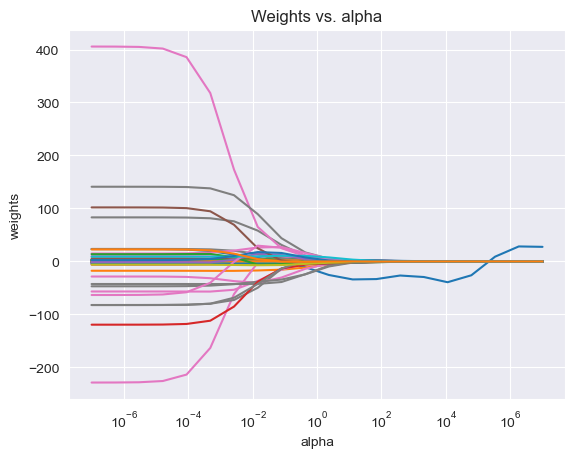

In [20]:
# Plot of coefficients vs. alphas
plt.plot(alphas, all_weights)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Weights vs. alpha')

Why are the values of the weights largest on the left? Do they all change monotonically? 

Because the values of the weights are largest on the left, the weights are largest when the regularization strength is smallest. The weights change monotonically because the regularization strength is increasing.
from analythical point of view the inverse part of the equation gets bigger as alpha increases, thus the weights get smaller.

Plot how the performance (i.e. the error) changes as a function of $\alpha$. As a sanity check, the MSE value for very small $\alpha$ should be close to the test-set MSE of the unregularized solution, i.e. 708.

[379.26901907]
[406.08869121]


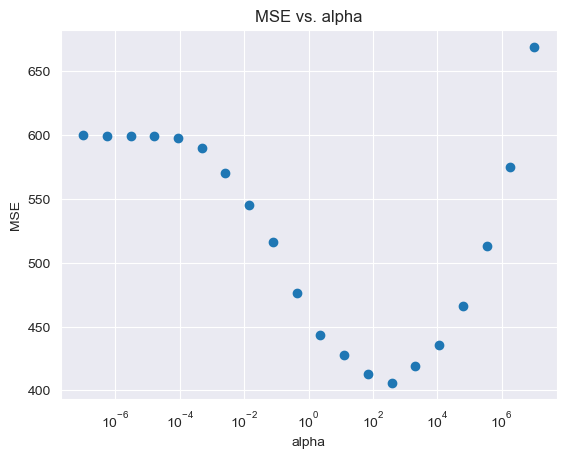

In [21]:
# Plot of MSE  vs. alphas
plt.scatter(alphas, all_mse)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('MSE vs. alpha')
print(alphas[ np.where( all_mse== min(all_mse))[0]])
print(min(all_mse))

Which value of $\alpha$ gives the minimum MSE? Is it better than the unregularized model? Why should the curve reach ~700 on the left?

Now implement the same model using sklearn. Use the `linear_model.Ridge` object to do so.


In [22]:
def ridge_regression_sklearn(X_test, X_train, y_train, alpha):
    '''Computes OLS weights for regularized linear regression with regularization strength alpha using the sklearn
       library on the training set and returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         alpha: scalar, regularization strength

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         The sklearn library automatically takes care of adding a column for the offset.
    '''

    # ---------------- INSERT CODE ----------------------
    #add a first column of zeros to the X_train and X_test
    X= np.hstack((np.ones((X_train.shape[0],1)),X_train))
    X_test = np.hstack((np.ones((X_test.shape[0],1)),X_test))
    y= y_train
    # Create linear regression object
    regr = linear_model.Ridge(alpha=alpha)
    weights = regr.fit(X, y).coef_
    y_pred = regr.predict(X_test)
    
    
    

    # ---------------- END CODE -------------------------

    return weights, y_pred

This time, only plot how the performance changes as a function of $\alpha$. 

alpha: 1e-07, MSE: 599.7369581783507
alpha: 5.455594781168515e-07, MSE: 599.7244681882397
alpha: 2.976351441631319e-06, MSE: 599.6564682362714
alpha: 1.623776739188721e-05, MSE: 599.2895967656083
alpha: 8.858667904100833e-05, MSE: 597.4022258605476
alpha: 0.0004832930238571752, MSE: 589.5496423314914
alpha: 0.0026366508987303553, MSE: 570.7084456120983
alpha: 0.01438449888287663, MSE: 544.9925108898681
alpha: 0.07847599703514607, MSE: 516.4839000068615
alpha: 0.4281332398719387, MSE: 476.63849613727655
alpha: 2.3357214690901213, MSE: 442.968817657809
alpha: 12.742749857031322, MSE: 427.7883420558253
alpha: 69.51927961775591, MSE: 412.58817811980924
alpha: 379.26901907322383, MSE: 406.0886912129696
alpha: 2069.13808111479, MSE: 418.93302001020146
alpha: 11288.378916846883, MSE: 435.35824566307986
alpha: 61584.82110660255, MSE: 466.37297056207314
alpha: 335981.8286283774, MSE: 513.2234638207541
alpha: 1832980.71083243, MSE: 574.7235114541699
alpha: 10000000.0, MSE: 669.4637983239219
[379

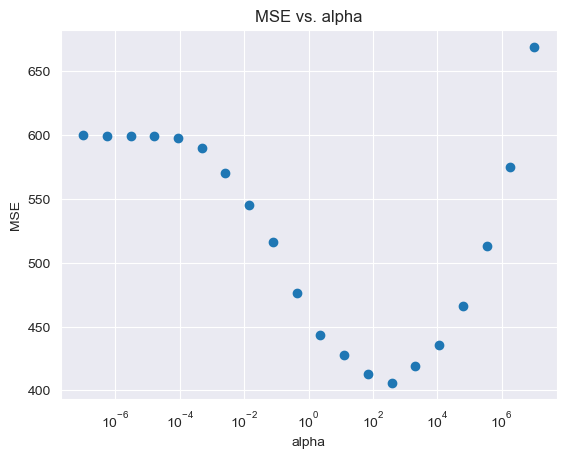

In [23]:

for alpha in alphas:
    weights, y_pred = ridge_regression(X_test, X_train, y_train, alpha)
    weights = [x for x in weights]
    mse = mean_squared_error(y_test, y_pred)
    print(f'alpha: {alpha}, MSE: {mse}')
    if alpha == alphas[0]:
        all_weights =  np.array([weights])
        all_mse = mse
    else:
        all_mse = np.vstack((all_mse, mse))
        all_weights = np.vstack((all_weights, [weights]))

all_weights= np.squeeze(all_weights)

plt.scatter(alphas, all_mse)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('MSE vs. alpha')
print(alphas[ np.where( all_mse== min(all_mse))[0]])
print(min(all_mse))


Note: Don't worry if the curve is not exactly identical to the one you got above. The loss function we wrote down in the lecture  has $\alpha$ defined a bit differently compared to sklearn. However, qualitatively it should look the same.

## Task 5: Cross-validation

Until now, we always estimated the error on the test set directly. However, we typically do not want to tune hyperparameters of our inference algorithms like $\alpha$ on the test set, as this may lead to overfitting. Therefore, we tune them on the training set using cross-validation. As discussed in the lecture, the training data is here split in `n_folds`-ways, where each of the folds serves as a held-out dataset in turn and the model is always trained on the remaining data. Implement a function that performs cross-validation for the ridge regression parameter $\alpha$. You can reuse functions written above.

In [24]:
def ridgeCV(X, y, n_folds, alphas):
    '''Runs a n_fold-crossvalidation over the ridge regression parameter alpha.
       The function should train the linear regression model for each fold on all values of alpha.

      Inputs:
        X: (n_obs, n_features) numpy array - predictor
        y: (n_obs,) numpy array - target
        n_folds: integer - number of CV folds
        alphas: (n_parameters,) - regularization strength parameters to CV over

      Outputs:
        cv_results_mse: (n_folds, len(alphas)) numpy array, MSE for each cross-validation fold

      Note:
        Fix the seed for reproducibility.
    '''

    cv_results_mse = np.zeros((n_folds, len(alphas)))
    np.random.seed(seed=2)

    # ---------------- INSERT CODE ----------------------
    n_obs = X.shape[0]
    idx = np.arange(n_obs)
    idx_shuffled = np.random.permutation(idx)  # shuffle indices to split into training and test set
    fold_size = n_obs // n_folds
    for i in range(n_folds):
        test_idx = idx_shuffled[i*fold_size:(i+1)*fold_size]
        train_idx = np.concatenate((idx_shuffled[:i*fold_size], idx_shuffled[(i+1)*fold_size:]))
        X_test = X[test_idx]
        y_test = y[test_idx]
        X_train = X[train_idx]
        y_train = y[train_idx]
        for j, alpha in enumerate(alphas):
            weights, y_pred = ridge_regression(X_test, X_train, y_train, alpha)
            cv_results_mse[i, j] = mean_squared_error(y_test, y_pred)
    


    # ---------------- END CODE -------------------------

    return cv_results_mse

Now we run 10-fold cross-validation using the training data of a range of $\alpha$s.

In [25]:
alphas = np.logspace(-7, 7, 100)
mse_cv = ridgeCV(X_train, y_train, n_folds=10, alphas=alphas)

We plot the MSE trace for each fold separately:

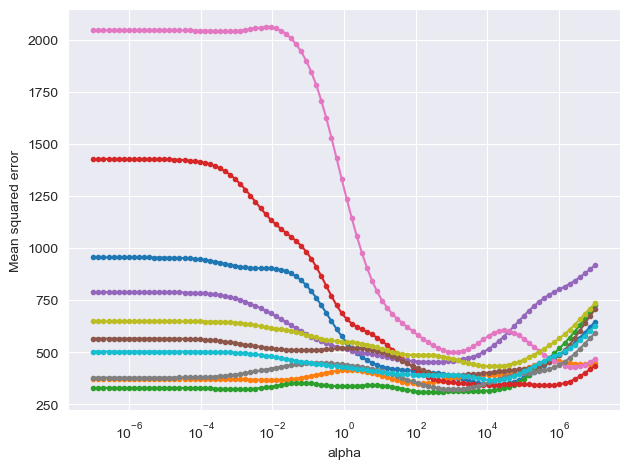

In [32]:
plt.plot(alphas, mse_cv.T, '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

We also plot the average across folds:

394.49563224644305
[2104.90414451]


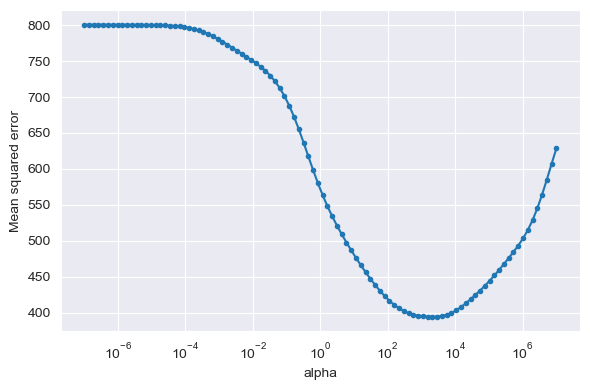

In [27]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv, axis=0), '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()
mse_means = np.mean(mse_cv, axis=0)
print(min(mse_means))
print(alphas[ np.where( mse_means== min(mse_means))[0]])


What is the optimal $\alpha$? Is it similar to the one found on the test set? Do the cross-validation MSE and the test-set MSE match well or differ strongly?

YOUR ANSWER HERE

We will now run cross-validation on the full training data. This will take a moment, depending on the speed of your computer. Afterwards, we will again plot the mean CV curves for the full data set (blue) and the small data set (orange).

In [28]:
alphas = np.logspace(-7, 7, 100)
mse_cv_full = ridgeCV(X_train_full, y_train_full, n_folds=10, alphas=alphas)

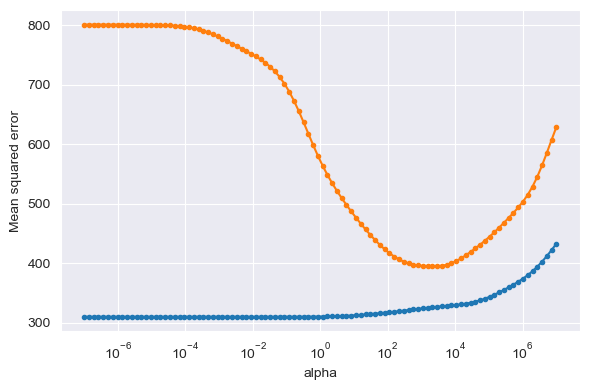

In [29]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv_full, axis=0), '.-')
plt.plot(alphas, np.mean(mse_cv, axis=0), '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

We zoom in on the blue curve to the very left:

Min alpha [0.03274549]
Min MSE 309.90399277535306


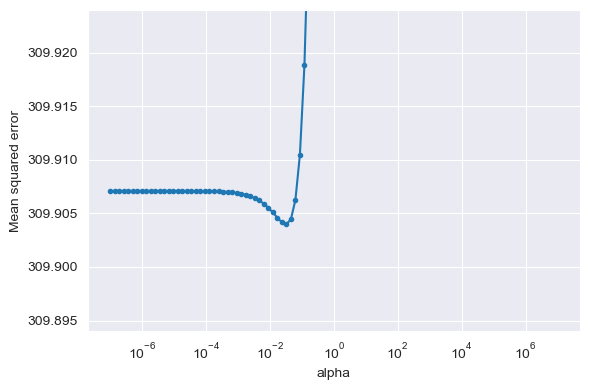

In [30]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv_full, axis=0), '.-')
plt.xscale('log')
minValue = np.min(np.mean(mse_cv_full, axis=0))
plt.ylim([minValue-.01, minValue+.02])
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()
print('Min alpha',alphas[ np.where( np.mean(mse_cv_full, axis=0)== minValue)[0]])
print('Min MSE',minValue)

Why does the CV curve on the full data set look so different? What is the optimal value of $\alpha$ and why is it so much smaller than on the small training set?

YOUR ANSWER HERE